# Модели для распознования сердечных заболеваний по табличным данным

"heart.csv" - это многофакторный тип набора данных, что означает предоставление или включение различных отдельных математических или статистических переменных для многомерного численного анализа данных.

Информация об атрибутах датасета:
1. id - уникальный идентификатор каждого пациента.
2. age - возраст пациента в годах.
3. sex - пол пациента
4. dataset - место проведение исследования.
5. cp (chest pain type) - тип боли в груди: типичная стенокардия (typical angina), нетипичная стенокардия (atypical angina), неангиальная болезнь (non-anginal), асимптоматичная (asymptomatic).
6. trestbps (resting blood pressure) - артериальное давние в покое (в мм рт. ст. при поступлении в больницу).
7. chol (serum cholesterol) - уровень холестерина в сывортоке крови (в мг/дл).
8. fbs (fasting blood sugar) - уровень сахара в крови натощак (если > 120 мг/дл - возможно диабет).
9. restecg (resting electrocardiographoc results) - результаты электрокардиографии в покое: нормальные (normal), аномалия ST-T (stt abnormaly), гипертрофия левого желудочка (lv hypetrophy)
10. thalach - максимальная достигнутая частота сердечных сокращений.
11. exang (exersice-unduced angina) - стенокардия, вызванная упражнениями (да/нет).
12. oldpeak - депрессия ST, вызванная упражнениями относительно состояния покоя.
13. slope - угол наклона пикового сегмента ST при упражнениях: нисходящий угол наклона (downsloping), плоский (flat), восходящий (upsloping).
14. ca - количество крупных сосудов (0-3), окрашенных с помощью флюроскапии.
15. thal - талассемия: нормальная (normal), фиксированный дефект (fixed defect), обратимый дефект (reversable defect).
16. num - предсказываемый атрибут: нет сердечных заболеваний (0), легкое сердечное заболевание (1), умеренное сердечное заболевание (2), тяжелое сердечное заболевание (3), критическое сердечное заболевание (4).

## Импортирование пакетов

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import statsmodels.api as sm
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

import optuna
import sklearn

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

import joblib
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

2024-05-16 17:30:40.808006: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Работа с данными

In [2]:
df = pd.read_csv('heart.csv')
print(f'Вывод первых пяти колонок датасета: ')
df.head()

Вывод первых пяти колонок датасета: 


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
print(f'Размер датасета: {df.shape}')

Размер датасета: (920, 16)


## Анализ типов данных и их полнота

In [4]:
print('Информация о типах данных для каждого столбца:')
df.info()

Информация о типах данных для каждого столбца:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

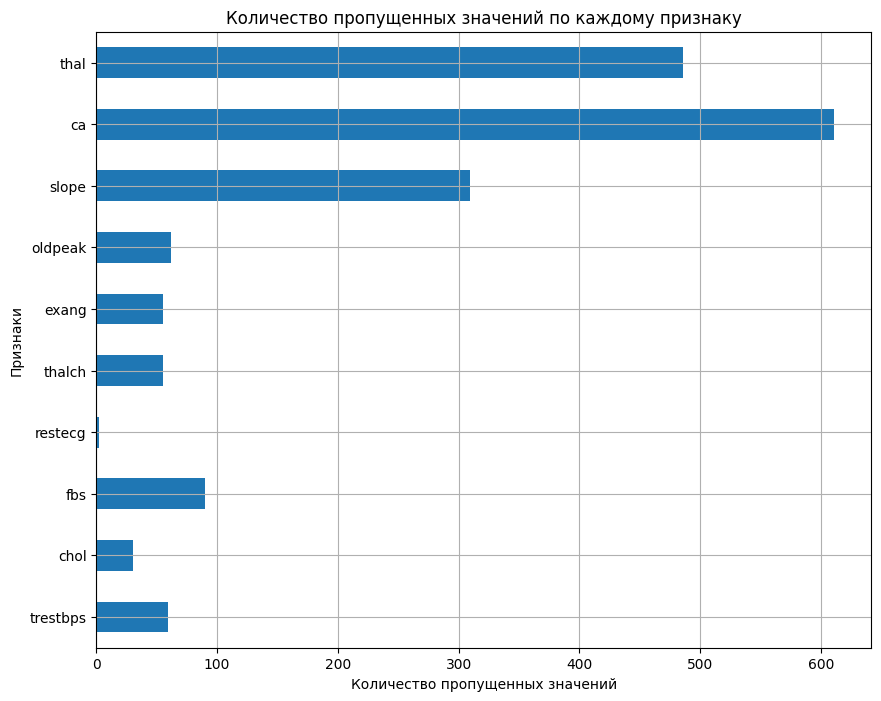

In [6]:
# Подсчитываем количество пропущенных значений в каждом столбце DataFrame
missing_values_count = df.isnull().sum()

# Фильтруем столбцы, где есть пропущенные значения (оставляем только те, где количество пропусков больше нуля)
missing_values_count = missing_values_count[missing_values_count > 0]

# Создаем график
plt.figure(figsize=(10, 8))  # Увеличиваем размер графика до 10x8 дюймов
missing_values_count.plot(kind='barh')  # Используем горизонтальные столбцы для графика

# Добавляем заголовок и подписи к осям
plt.title('Количество пропущенных значений по каждому признаку')
plt.xlabel('Количество пропущенных значений')
plt.ylabel('Признаки')

# Включаем сетку на графике для лучшей читаемости
plt.grid(True)

# Отображаем график
plt.show()

## Заполнение пропущенных данных

In [7]:
# Идентификация столбцов с пропущенными данными и подсчет их количества
# Выводится только количество пропущенных данных для тех столбцов, где они есть, и сортировка в порядке убывания
missing_data_summary = df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
print(missing_data_summary)

# Получение списка столбцов, в которых есть пропущенные данные
# Это делается путем фильтрации индексов из предыдущего вычисления, где количество пропущенных данных больше нуля
missing_data_cols = missing_data_summary.index.tolist()

# Вывод списка столбцов с пропущенными данными
print(missing_data_cols)


ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64
['ca', 'thal', 'slope', 'fbs', 'oldpeak', 'trestbps', 'thalch', 'exang', 'chol', 'restecg']


In [8]:
# Классификация столбцов по типам данных для дальнейшей обработки
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [9]:
def impute_categorical_missing_data(passed_col):
    """
    Функция для заполнения пропущенных категориальных данных.
    
    :param passed_col: Имя столбца, в котором требуется заполнить пропущенные данные.
    :return: Обновленная серия с заполненными данными.
    """
    # Разделяем данные на те, где есть значения, и где они пропущены
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    # Идентифицируем другие колонки с пропущенными данными
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()
    # Кодируем категориальные переменные
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    # Используем итеративный импутер для заполнения пропущенных значений
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    # Разделяем данные для обучения и тестирования
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)

    print(f"Точность восстановления признака '{passed_col}': {round(acc_score * 100, 2)}%")

    # Заполняем пропущенные значения в исходном наборе данных
    X = df_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})

    df_combined = pd.concat([df_not_null, df_null])
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    """
    Функция для заполнения пропущенных непрерывных данных.
    
    :param passed_col: Имя столбца, в котором требуется заполнить пропущенные данные.
    :return: Обновленная серия с заполненными данными.
    """
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Средняя абсолютная ошибка (MAE) для '{passed_col}': {mae}")

    X = df_null.drop(passed_col, axis=1)
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)

    df_combined = pd.concat([df_not_null, df_null])
    return df_combined[passed_col]


In [10]:
# Функция для заполнения пропущенных значений с использованием соответствующих методов
for col in missing_data_cols:
    # Расчет процента пропущенных значений в каждом столбце
    missing_percentage = round((df[col].isnull().sum() / len(df)) * 100, 2)
    print(f"Пропущенные значения в '{col}': {missing_percentage}%")

    # Определение типа данных столбца и выбор метода заполнения
    if col in categorical_cols:
        # Заполнение категориальных данных
        df[col] = impute_categorical_missing_data(col)
        print(f"Категориальные данные '{col}' обновлены.")
    elif col in numeric_cols:
        # Заполнение непрерывных данных
        df[col] = impute_continuous_missing_data(col)
        print(f"Непрерывные данные '{col}' обновлены.")
    else:
        # Для столбцов, не входящих в категории категориальных или непрерывных данных, пропускаем обработку
        print(f"Для столбца '{col}' метод заполнения не определён.")

print("Заполнение пропущенных данных завершено.")


Пропущенные значения в 'ca': 66.41%
Точность восстановления признака 'ca': 62.9%
Категориальные данные 'ca' обновлены.
Пропущенные значения в 'thal': 52.83%
Точность восстановления признака 'thal': 72.41%
Категориальные данные 'thal' обновлены.
Пропущенные значения в 'slope': 33.59%
Точность восстановления признака 'slope': 69.92%
Категориальные данные 'slope' обновлены.
Пропущенные значения в 'fbs': 9.78%
Точность восстановления признака 'fbs': 80.12%
Категориальные данные 'fbs' обновлены.
Пропущенные значения в 'oldpeak': 6.74%
Средняя абсолютная ошибка (MAE) для 'oldpeak': 0.6170116279069767
Непрерывные данные 'oldpeak' обновлены.
Пропущенные значения в 'trestbps': 6.41%
Средняя абсолютная ошибка (MAE) для 'trestbps': 13.036705202312142
Непрерывные данные 'trestbps' обновлены.
Пропущенные значения в 'thalch': 5.98%
Средняя абсолютная ошибка (MAE) для 'thalch': 16.099884393063583
Непрерывные данные 'thalch' обновлены.
Пропущенные значения в 'exang': 5.98%
Точность восстановления приз

In [11]:
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


## Выбросы в данных

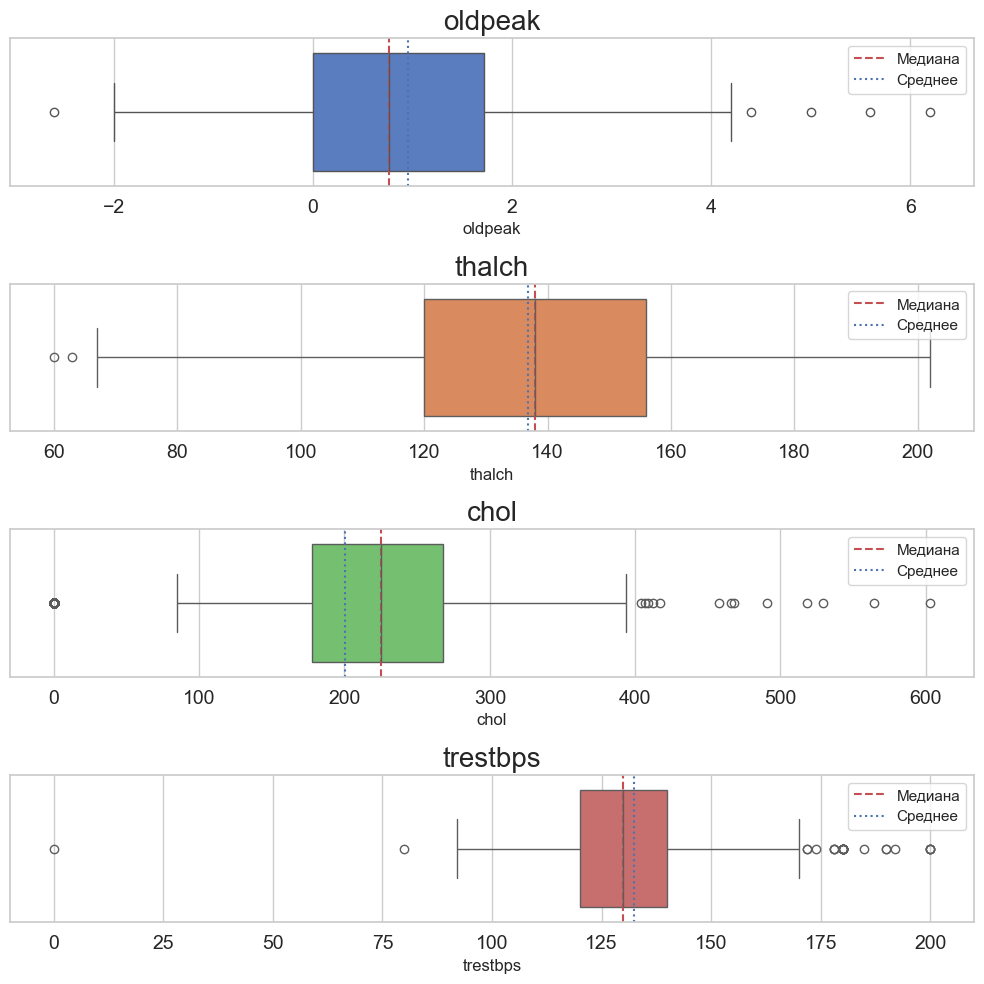

In [12]:
# numeric_cols уже определен и содержит все числовые столбцы
# Исключаем столбец 'age' из списка числовых столбцов
filtered_numeric_cols = [col for col in numeric_cols if col != 'age']

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Увеличиваем размер фигуры
plt.figure(figsize=(10, 10))  # Увеличенный размер для каждого графика

# Задаем цвета для каждого из графиков
palette = sns.color_palette("muted", n_colors=len(filtered_numeric_cols))

# Цикл для создания ящиков с усами для каждого числового столбца
for i, col in enumerate(filtered_numeric_cols):
    plt.subplot(len(filtered_numeric_cols), 1, i + 1)  # Один график на строку
    
    # Отрисовка ящика с усами
    sns.boxplot(x=df[col], color=palette[i])
    
    # Добавление медианы и среднего
    median = df[col].median()
    mean = df[col].mean()
    plt.axvline(median, color='r', linestyle='--', label='Медиана')
    plt.axvline(mean, color='b', linestyle=':', label='Среднее')
    
    # Увеличиваем шрифты для лучшей читаемости
    plt.title(col, fontsize=20)  # Больший шрифт для заголовка
    plt.xticks(fontsize=14)  # Больший шрифт для меток на оси X
    plt.yticks(fontsize=14)  # Больший шрифт для меток на оси Y

    # Добавление легенды на каждый график
    plt.legend()

# Отображаем все графики
plt.tight_layout()
plt.show()


In [13]:
# Столбец trestbps имеет значение 0 как выброс
# Находим строки, где значение в столбце 'trestbps' равно 0
df[df['trestbps'] == 0]

df[df['chol'] == 0]

# Удаляем эти строки из датафрейма
df = df.drop(df[df['trestbps'] == 0].index) # Удаление строк, где 'trestbps' равно 0
df = df.drop(df[df['chol'] == 0].index) # Удаление строк, где 'chol' равно 0 

In [14]:
# Вывод количества строк после удаления записей со значением 0 в столбце 'trestbps'
print("Количество строк после удаления нулей из столбца trestbps составляет:", df.shape)

Количество строк после удаления нулей из столбца trestbps составляет: (748, 16)


In [15]:
# проверка дубликатов
print('Количество дубликатов в датасете:', df.duplicated().sum())

Количество дубликатов в датасете: 0


## Обучение моделей

In [16]:
data = df.copy()

In [17]:
# Задаем список столбцов, которые нужно нормализовать
columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

# Создаем пустой словарь для хранения MinMaxScaler для каждого столбца
min_max_scalers = {}

# Проходим по каждому столбцу из списка для нормализации
for col in columns_to_scale:
    # Создаем новый MinMaxScaler для текущего столбца
    scaler = MinMaxScaler()

    # Применяем масштабирование: обучаем и трансформируем данные
    data[col] = scaler.fit_transform(data[[col]])

    # Сохраняем обученный скейлер в словарь
    min_max_scalers[col] = scaler

# Сохраняем словарь с скейлерами в файл 'scalers.pkl'
joblib.dump(min_max_scalers, 'scalers.pkl')

['scalers.pkl']

In [18]:
# Задаем список столбцов, которые нужно закодировать
columns_to_encode = ['thal', 'ca', 'dataset', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']

# Создаем пустой словарь для хранения LabelEncoder для каждого столбца
label_encoders = {}

# Цикл для применения LabelEncoder к каждому столбцу из списка
for col in columns_to_encode:
    # Создаем новый LabelEncoder для текущего столбца
    le = LabelEncoder()

    # Обучаем и трансформируем данные
    data[col] = le.fit_transform(data[col])

    # Сохраняем обученный энкодер в словарь
    label_encoders[col] = le

In [19]:
# Создаем новый DataFrame, содержащий выбранные столбцы из исходных данных
filtered_data = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()

# Создаем новый столбец 'target', который будет содержать бинарные значения: 
# 1, если значение в столбце 'num' больше 0, и 0 в противном случае
filtered_data['target'] = ((data['num'] > 0) * 1).copy()

# Выводим первые несколько строк нового DataFrame для проверки
filtered_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,0.714286,1,3,0.490741,0.285714,1,0,0.609023,0,0.370968,0,0,0,0
1,0.795918,1,0,0.629630,0.388031,0,0,0.293233,1,0.241935,1,3,1,1
2,0.795918,1,0,0.259259,0.277992,0,0,0.451128,1,0.419355,1,2,2,1
3,0.183673,1,2,0.351852,0.318533,0,1,0.887218,0,0.564516,0,0,1,0
4,0.265306,0,1,0.351852,0.229730,0,0,0.774436,0,0.225806,2,0,1,0


In [20]:
# Функция для удаления признаков с низкой дисперсией
def remove_low_variance(input_data, threshold=0.02):
    # Вычисляем дисперсию каждого признака
    variances = input_data.var()
    print("Дисперсии каждого признака:\n", variances)
    
    # Создаем объект VarianceThreshold с заданным порогом
    selector = VarianceThreshold(threshold)
    
    # Обучаем селектор на входных данных
    selector.fit(input_data)
    
    # Получаем признаки, которые прошли порог дисперсии
    retained_features = input_data.columns[selector.get_support(indices=True)]
    
    # Получаем признаки, которые не прошли порог дисперсии
    removed_features = input_data.columns.difference(retained_features)
    print(f"Удалённые признаки из-за низкой дисперсии (порог = {threshold}):", removed_features.tolist())
    
    # Возвращаем данные только с признаками, прошедшими порог дисперсии
    return input_data[retained_features]

# Функция для удаления признаков с высокой корреляцией
def remove_highly_correlated(input_data, threshold=0.85):
    # Вычисляем матрицу корреляций и берем абсолютные значения
    corr_matrix = input_data.corr().abs()
    
    # Создаем верхний треугольник матрицы корреляций
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Ищем признаки, которые имеют корреляцию выше порога
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print(f"Удалённые признаки из-за высокой корреляции (порог = {threshold}):", to_drop)
    
    # Возвращаем данные без признаков с высокой корреляцией
    return input_data.drop(to_drop, axis=1, errors='ignore')

# Удаление признаков с низкой дисперсией из данных, исключая столбец 'target'
filtered_data_reduced = remove_low_variance(filtered_data.drop('target', axis=1))

# Удаление признаков с высокой корреляцией из данных
filtered_data_reduced = remove_highly_correlated(filtered_data_reduced)

# Добавляем столбец 'target' обратно к данным
filtered_data_reduced['target'] = filtered_data['target']


Дисперсии каждого признака:
 age         0.037557
sex         0.185045
cp          0.917517
trestbps    0.025813
chol        0.012357
fbs         0.136682
restecg     0.399810
thalch      0.033647
exang       0.239724
oldpeak     0.032526
slope       0.333188
ca          0.571992
thal        0.390167
dtype: float64
Удалённые признаки из-за низкой дисперсии (порог = 0.02): ['chol']
Удалённые признаки из-за высокой корреляции (порог = 0.85): []


In [21]:
# Выводим первые несколько строк нового DataFrame для проверки
filtered_data_reduced.head()

,age,sex,cp,trestbps,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,0.714286,1,3,0.490741,1,0,0.609023,0,0.370968,0,0,0,0
1,0.795918,1,0,0.629630,0,0,0.293233,1,0.241935,1,3,1,1
2,0.795918,1,0,0.259259,0,0,0.451128,1,0.419355,1,2,2,1
3,0.183673,1,2,0.351852,0,1,0.887218,0,0.564516,0,0,1,0
4,0.265306,0,1,0.351852,0,0,0.774436,0,0.225806,2,0,1,0


In [23]:
# Загрузка данных
df = filtered_data_reduced.copy()

# Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('target', axis=1)
y = df['target']

# Использование RFE (Recursive Feature Elimination) для отбора признаков
estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=11, step=1)  # Укажите нужное количество признаков
X_selected = selector.fit_transform(X, y)

# Сохранение выбранных признаков
selected_features = X.columns[selector.support_]

# Вывод выбранных признаков
print("Выбранные признаки для обучения:")
print(selected_features)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Определение функций для оптимизации моделей с использованием Optuna
def objective_rf(trial):
    # Определение гиперпараметров для RandomForest
    n_estimators = trial.suggest_int("n_estimators", 50, 100)
    max_depth = trial.suggest_int("max_depth", 2, 4)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    
    # Создание и обучение модели RandomForest
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def objective_xgb(trial):
    # Определение гиперпараметров для XGBoost
    n_estimators = trial.suggest_int("n_estimators", 50, 100)
    max_depth = trial.suggest_int("max_depth", 2, 9)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.1)
    reg_lambda = trial.suggest_float("reg_lambda", 0.0, 0.3)
    reg_alpha = trial.suggest_float("reg_alpha", 0.0, 0.3)
    
    # Создание и обучение модели XGBoost
    model = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
                              reg_lambda=reg_lambda, reg_alpha=reg_alpha, use_label_encoder=False,
                              eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def objective_mlp(trial):
    # Определение гиперпараметров для MLP (многослойный перцептрон)
    n_layers = trial.suggest_int("n_layers", 2, 2)
    model = Sequential()
    model.add(Dense(trial.suggest_int("n_units_l0", 32, 128), activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(trial.suggest_float("dropout_l0", 0.0, 0.5)))  # Добавляем Dropout для первого слоя
    
    # Добавление дополнительных слоев
    for i in range(1, n_layers):
        model.add(Dense(trial.suggest_int(f"n_units_l{i}", 32, 128), activation='relu'))
        model.add(Dropout(trial.suggest_float(f"dropout_l{i}", 0.0, 0.5)))  # Добавляем Dropout для каждого слоя
    
    # Добавление выходного слоя
    model.add(Dense(1, activation='sigmoid'))
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

def objective_lstm(trial):
    # Определение гиперпараметров для LSTM
    n_units_1 = trial.suggest_int("n_units_1", 20, 100)  # Нейроны для первого LSTM слоя
    n_units_2 = trial.suggest_int("n_units_2", 20, 100)  # Нейроны для второго LSTM слоя
    dropout_1 = trial.suggest_float("dropout_1", 0.0, 0.5)  # Дропаут для первого LSTM слоя
    dropout_2 = trial.suggest_float("dropout_2", 0.0, 0.5)  # Дропаут для второго LSTM слоя
    
    # Создание модели LSTM
    model = Sequential()
    model.add(LSTM(n_units_1, return_sequences=True, input_shape=(1, X_train.shape[1])))  # Первый LSTM слой
    model.add(Dropout(dropout_1))
    model.add(LSTM(n_units_2))  # Второй LSTM слой
    model.add(Dropout(dropout_2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Компиляция модели
    lr = trial.suggest_float("lr", 1e-4, 1e-2)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])
    
    # Подготовка данных
    X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    # Обучение модели
    model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
    return accuracy

# Создание и оптимизация Optuna study для каждой модели
study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=100)
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=100)
study_mlp = optuna.create_study(direction="maximize")
study_mlp.optimize(objective_mlp, n_trials=100)
study_lstm = optuna.create_study(direction="maximize")
study_lstm.optimize(objective_lstm, n_trials=100)

# Сохранение и вывод лучших параметров
best_params_rf = study_rf.best_params
best_params_xgb = study_xgb.best_params
best_params_mlp = study_mlp.best_params
best_params_lstm = study_lstm.best_params
print("Лучшие параметры RandomForest:", best_params_rf)
print("Лучшие параметры XGBoost:", best_params_xgb)
print("Лучшие параметры MLP:", best_params_mlp)
print("Лучшие параметры LSTM:", best_params_lstm)

# Обучение и оценка моделей с лучшими параметрами
start_time = time.time()
model_rf = RandomForestClassifier(**study_rf.best_params, random_state=42)
model_rf.fit(X_train, y_train)
rf_train_time = time.time() - start_time
y_pred_rf = model_rf.predict(X_test)

start_time = time.time()
model_xgb = xgb.XGBClassifier(**study_xgb.best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
xgb_train_time = time.time() - start_time
y_pred_xgb = model_xgb.predict(X_test)

# MLP
start_time = time.time()
model_mlp = Sequential([
    Dense(study_mlp.best_params['n_units_l0'], activation='relu', input_dim=X_train.shape[1]),
    Dropout(study_mlp.best_params['dropout_l0'])  # Используем подобранный коэффициент Dropout
])
for i in range(1, study_mlp.best_params['n_layers']):
    model_mlp.add(Dense(study_mlp.best_params[f'n_units_l{i}'], activation='relu'))
    model_mlp.add(Dropout(study_mlp.best_params[f'dropout_l{i}']))  # Используем подобранный коэффициент Dropout
model_mlp.add(Dense(1, activation='sigmoid'))
model_mlp.compile(optimizer=Adam(learning_rate=study_mlp.best_params['lr']), loss='binary_crossentropy', metrics=['accuracy'])
model_mlp.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
mlp_train_time = time.time() - start_time
_, mlp_test_accuracy = model_mlp.evaluate(X_test, y_test, verbose=0)

# LSTM
start_time = time.time()
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model_lstm = Sequential([
    LSTM(study_lstm.best_params['n_units_1'], return_sequences=True, input_shape=(1, X_train.shape[1])),  # Используем подобранные коэффициенты для первого LSTM слоя
    Dropout(study_lstm.best_params['dropout_1']),  # Используем подобранный коэффициент Dropout для первого LSTM слоя
    LSTM(study_lstm.best_params['n_units_2']),  # Используем подобранные коэффициенты для второго LSTM слоя
    Dropout(study_lstm.best_params['dropout_2']),  # Используем подобранный коэффициент Dropout для второго LSTM слоя
    Dense(1, activation='sigmoid')
])
model_lstm.compile(optimizer=Adam(learning_rate=study_lstm.best_params['lr']), loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=0)
lstm_train_time = time.time() - start_time
_, lstm_test_accuracy = model_lstm.evaluate(X_test_reshaped, y_test, verbose=0)

# MLP
y_pred_mlp = model_mlp.predict(X_test) > 0.5  # Применяем порог, чтобы преобразовать вероятности в бинарные метки
y_pred_mlp_train = model_mlp.predict(X_train) > 0.5  # То же самое для обучающего набора

# LSTM
y_pred_lstm = model_lstm.predict(X_test_reshaped) > 0.5  # Применяем порог
y_pred_lstm_train = model_lstm.predict(X_train_reshaped) > 0.5  # То же самое

# Сбор результатов
results = {
    "RandomForest": {
        "Train accuracy": accuracy_score(y_train, model_rf.predict(X_train)),
        "Test accuracy": accuracy_score(y_test, y_pred_rf),
        "Train F1 average": f1_score(y_train, model_rf.predict(X_train), average='macro'),
        "Test F1 average": f1_score(y_test, y_pred_rf, average='macro'),
        "Training time (s)": rf_train_time
    },
    "XGBoost": {
        "Train accuracy": accuracy_score(y_train, model_xgb.predict(X_train)),
        "Test accuracy": accuracy_score(y_test, y_pred_xgb),
        "Train F1 average": f1_score(y_train, model_xgb.predict(X_train), average='macro'),
        "Test F1 average": f1_score(y_test, y_pred_xgb, average='macro'),
        "Training time (s)": xgb_train_time
    },
    "MLP": {
        "Train accuracy": accuracy_score(y_train, y_pred_mlp_train),
        "Test accuracy": accuracy_score(y_test, y_pred_mlp),
        "Train F1 average": f1_score(y_train, y_pred_mlp_train, average='macro'),
        "Test F1 average": f1_score(y_test, y_pred_mlp, average='macro'),
        "Training time (s)": mlp_train_time
    },
    "LSTM": {
        "Train accuracy": accuracy_score(y_train, y_pred_lstm_train),
        "Test accuracy": accuracy_score(y_test, y_pred_lstm),
        "Train F1 average": f1_score(y_train, y_pred_lstm_train, average='macro'),
        "Test F1 average": f1_score(y_test, y_pred_lstm, average='macro'),
        "Training time (s)": lstm_train_time
    }
}

# Вывод результатов
results_df = pd.DataFrame(results).T
print(results_df)

# Нахождение и вывод лучшей модели
best_model_name = results_df['Test accuracy'].idxmax()
best_model_results = results_df.loc[best_model_name]

print("\nЛучшая модель по точности на тестовом наборе:")
print(f"Модель: {best_model_name}")
print(best_model_results)

# Сохранение лучшей модели
if best_model_name == "RandomForest":
    best_model = model_rf
    joblib.dump(best_model, "best_model_random_forest.joblib")
elif best_model_name == "XGBoost":
    best_model = model_xgb
    best_model.save_model("best_model_xgboost.json")
    joblib.dump(best_model, "best_model_xgboost.joblib")
elif best_model_name == "MLP":
    best_model = model_mlp
    best_model.save("best_model_mlp.h5")
elif best_model_name == "LSTM":
    best_model = model_lstm
    best_model.save("best_model_lstm.h5")

# Нахождение и вывод худшей модели
worst_model_name = results_df['Test accuracy'].idxmin()
worst_model_results = results_df.loc[worst_model_name]

print("\nХудшая модель по точности на тестовом наборе:")
print(f"Модель: {worst_model_name}")
print(worst_model_results)

[I 2024-05-16 17:53:17,062] A new study created in memory with name: no-name-2bbb2942-0944-496e-a931-710b7fcf9f2f
[I 2024-05-16 17:53:17,212] Trial 0 finished with value: 0.8266666666666667 and parameters: {'n_estimators': 72, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.8266666666666667.


Выбранные признаки для обучения:
Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalch', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


[I 2024-05-16 17:53:17,368] Trial 1 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 78, 'max_depth': 3, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8333333333333334.
[I 2024-05-16 17:53:17,549] Trial 2 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 81, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 18}. Best is trial 1 with value: 0.8333333333333334.
[I 2024-05-16 17:53:17,704] Trial 3 finished with value: 0.84 and parameters: {'n_estimators': 85, 'max_depth': 4, 'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.84.
[I 2024-05-16 17:53:17,843] Trial 4 finished with value: 0.84 and parameters: {'n_estimators': 86, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 3 with value: 0.84.
[I 2024-05-16 17:53:17,954] Trial 5 finished with value: 0.82 and parameters: {'n_estimators': 62, 'max_depth': 2, 'min_samples_split': 16, 'min_samples

Лучшие параметры RandomForest: {'n_estimators': 63, 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 1}
Лучшие параметры XGBoost: {'n_estimators': 78, 'max_depth': 4, 'learning_rate': 0.055513825835342576, 'reg_lambda': 0.2673348140848838, 'reg_alpha': 0.13195909152941468}
Лучшие параметры MLP: {'n_layers': 2, 'n_units_l0': 116, 'dropout_l0': 0.41006288706780747, 'n_units_l1': 65, 'dropout_l1': 0.4750065904057571, 'lr': 0.007760105523149268}
Лучшие параметры LSTM: {'n_units_1': 65, 'n_units_2': 33, 'dropout_1': 0.3079658731922176, 'dropout_2': 0.23926560432727603, 'lr': 0.004164096050622985}
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              Train accuracy  Test accuracy  Train F1 average  \
RandomForest        0.876254       0.853333          0.875982   
XGBoost             0.933110       0.886667          0.933002   
MLP                 0.897993       0.82

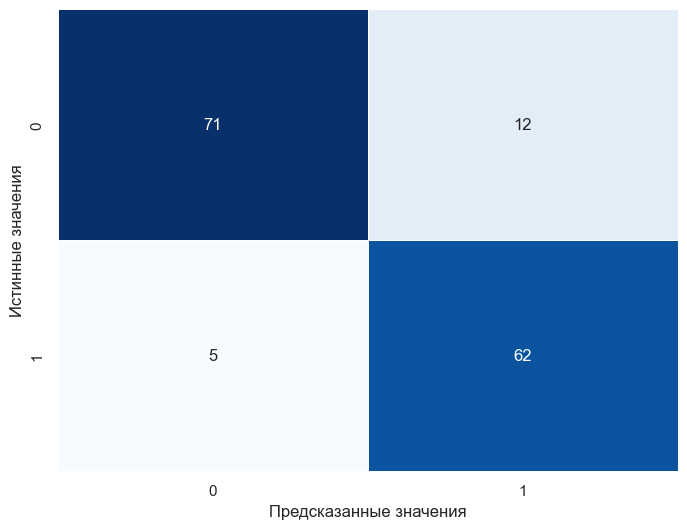

In [24]:
# Функция для визуализации матрицы ошибок
def plot_confusion_matrix(y_true, y_pred, model_name, figsize=(8, 6)):
    # Создание матрицы ошибок
    cm = confusion_matrix(y_true, y_pred)
    
    # Визуализация матрицы ошибок
    plt.figure(figsize=figsize)  # Установка размера фигуры
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=.5)  # Построение тепловой карты
    plt.xlabel("Предсказанные значения")  # Подпись оси X
    plt.ylabel("Истинные значения")  # Подпись оси Y
    #plt.title(f"Матрица ошибок для модели {model_name}")  # Заголовок графика (закомментирован)
    plt.show()  # Отображение графика

# Предсказание меток на тестовых данных для лучшей модели
best_model_pred = best_model.predict(X_test) if best_model_name != 'LSTM' else best_model.predict(X_test_reshaped) > 0.5

# Вызов функции для визуализации матрицы ошибок лучшей модели
plot_confusion_matrix(y_test, best_model_pred, best_model_name)

Информация об атрибутах датасета:
1. id - уникальный идентификатор каждого пациента.
2. age - возраст пациента в годах.
3. sex - пол пациента
4. dataset - место проведение исследования.
5. cp (chest pain type) - тип боли в груди: типичная стенокардия (typical angina), нетипичная стенокардия (atypical angina), неангиальная болезнь (non-anginal), асимптоматичная (asymptomatic).
6. trestbps (resting blood pressure) - артериальное давние в покое (в мм рт. ст. при поступлении в больницу).
7. chol (serum cholesterol) - уровень холестерина в сывортоке крови (в мг/дл).
8. fbs (fasting blood sugar) - уровень сахара в крови натощак (если > 120 мг/дл - диабет).
9. restecg (resting electrocardiographoc results) - результаты электрокардиографии в покое: нормальные (normal), аномалия ST-T (stt abnormaly), гипертрофия левого желудочка (lv hypetrophy)
10. thalch - максимальная достигнутая частота сердечных сокращений.
11. exang (exersice-unduced angina) - стенокардия, вызванная упражнениями (да/нет).
12. oldpeak - депрессия ST, вызванная упражнениями относительно состояния покоя.
13. slope - угол наклона пикового сегмента ST при упражнениях: нисходящий угол наклона (downsloping), плоский (flat), восходящий (upsloping).
14. ca - количество крупных сосудов (0-3), окрашенных с помощью флюроскапии.
15. thal - талассемия: нормальная (normal), фиксированный дефект (fixed defect), обратимый дефект (reversable defect).
16. num - предсказываемый атрибут: нет сердечных заболеваний (0), легкое сердечное заболевание (1), умеренное сердечное заболевание (2), тяжелое сердечное заболевание (3), критическое сердечное заболевание (4).

age - возраст пациента в годах.
sex - male (1), female (0)
cp - typical angina (3), atypical angina (1), non-anginal (2), asymptomatic (0).
trestbps - артериальное давние в покое (в мм рт. ст. при поступлении в больницу).
chol - уровень холестерина в сывортоке крови (в мг/дл).
fbs - true (1), false (0)
restecg - normal (1), stt abnormaly(2), lv hypetrophy (0)
thalch - thalch - максимальная достигнутая частота сердечных сокращений.
exang - FALSE(0), TRUE (1)
slope - downsloping (0), flat(1), upsloping (2)
ca - количество крупных сосудов (0-3), окрашенных с помощью флюроскапии.
thal - normal (1), fixed defect(0), reversable defect (2)

In [27]:
import joblib
import pandas as pd
import xgboost as xgb

# Загрузка модели
xgb_model = xgb.XGBClassifier()
xgb_model.load_model('best_model_xgboost.json')

# Загрузка масштабировщика
min_max_scalers = joblib.load('scalers.pkl')

# Данные для нового предсказания
data = {
    'age': [63],
    'sex': [1],
    'cp': [3],
    'trestbps': [150],
    'restecg': [0],
    'thalch': [150],
    'exang': [0],
    'oldpeak': [2.3],
    'slope': [0],
    'ca': [0],
    'thal': [0]
}

new_data = pd.DataFrame(data)

# Масштабирование выбранных признаков
columns_to_scale = ['oldpeak', 'thalch', 'trestbps', 'age']
for col in columns_to_scale:
    if col in new_data.columns:
        new_data[col] = min_max_scalers[col].transform(new_data[[col]])


predictions = xgb_model.predict(new_data)
print("Предсказания модели:", predictions)

Предсказания модели: [0]
